# Data Preparation 
## Tax Rates

In [29]:
# Import Tax rate data 
import pandas as pd
tax_rates = pd.read_csv('data05-22/taxrates.csv')

In [30]:
# Remove Na's from dataset
tax_rates = tax_rates.dropna()

In [31]:
# Round tax rates to second decimal
tax_rates = tax_rates.round(2)

tax_rates = tax_rates.sort_values(by = 'State')
tax_rates = tax_rates.drop(columns=['STATE', '2023']).reset_index(drop = True)

tax_rates.head()

,State,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50,6.50
1,Alaska,5.44,5.44,5.44,5.44,5.44,5.44,5.44,5.44,5.44,5.44,5.34,5.34,5.34,5.34,5.34,5.34,5.34,5.34
2,Arizona,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.97,6.50,5.50,5.50,4.90,4.90,4.90,4.90,4.90,4.90
3,Arkansas,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.92,3.87,3.65
4,California,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84,8.84


In [32]:
# Calculate the change in tax rate for each state from 2005 to 2022
tax_rates['Change_2005_2022'] = tax_rates['2022'] - tax_rates['2005']

# Sort by the change in tax rate in descending order and take the top states
top_tax_change_states = tax_rates.sort_values(by='Change_2005_2022', ascending=False).head()

top_tax_change_states[['State', '2005', '2022', 'Change_2005_2022']]


,State,2005,2022,Change_2005_2022
22,Michigan,1.90,6.00,4.10
13,Illinois,7.30,9.50,2.20
16,Kansas,4.00,5.50,1.50
20,Maryland,7.00,8.25,1.25
30,New Jersey,7.67,8.62,0.95


In [33]:
# Calculate change in tax rates over time
tax_rate_change = tax_rates.loc[:, '2005':'2022'].diff(axis=1)

# Drop 2005 column as no change in tax rate in the first year of data can be calculated
tax_rate_change = tax_rate_change.drop(columns=['2005'])

# Add the 'State' column back to the tax_rate_change dataframe
tax_rate_change['State'] = tax_rates['State']

# Introduce a new column in the dataframe calculating the absolute change over time
tax_rate_change['Abs_Change'] = tax_rate_change.iloc[:, :-1].abs().max(axis=1)

# Save 5 states with the highest change in tax rate
tr_change_largest = tax_rate_change.sort_values(by='Abs_Change', ascending=False).head(5)

tr_change_largest = tr_change_largest[['State'] + list(tr_change_largest.columns[:-1])]


In [34]:
tr_change_largest

,State,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,State
35,Ohio,0.0,0.0,0.00,-6.54,0.0,-0.26,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,Ohio
22,Michigan,0.0,0.0,3.05,0.00,0.0,-4.95,6.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,Michigan
43,Texas,4.5,0.0,-3.50,-1.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,Texas
25,Missouri,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-2.25,0.0,0.0,Missouri
13,Illinois,0.0,0.0,0.00,0.00,0.0,2.20,0.0,0.0,0.0,-1.75,0.0,0.0,1.75,0.0,0.00,0.0,0.0,Illinois


In [35]:
biz_apps_temp = pd.read_csv('data05-22/biz_apps_new.csv')
biz_apps_temp.head()

biz_apps_temp['Change_2005_2022'] = biz_apps_temp['2022'] - biz_apps_temp['2005']

# Sort by the change in tax rate in descending order and take the top states
top_states_biz_apps = biz_apps_temp.sort_values(by='Change_2005_2022', ascending=False).head()

top_states_biz_apps[['State', '2005', '2022', 'Change_2005_2022']]


,State,2005,2022,Change_2005_2022
9,FL,281702,607279,325577
43,TX,174117,464959,290842
4,CA,271636,485954,214318
10,GA,97214,272636,175422
32,NY,173019,298059,125040


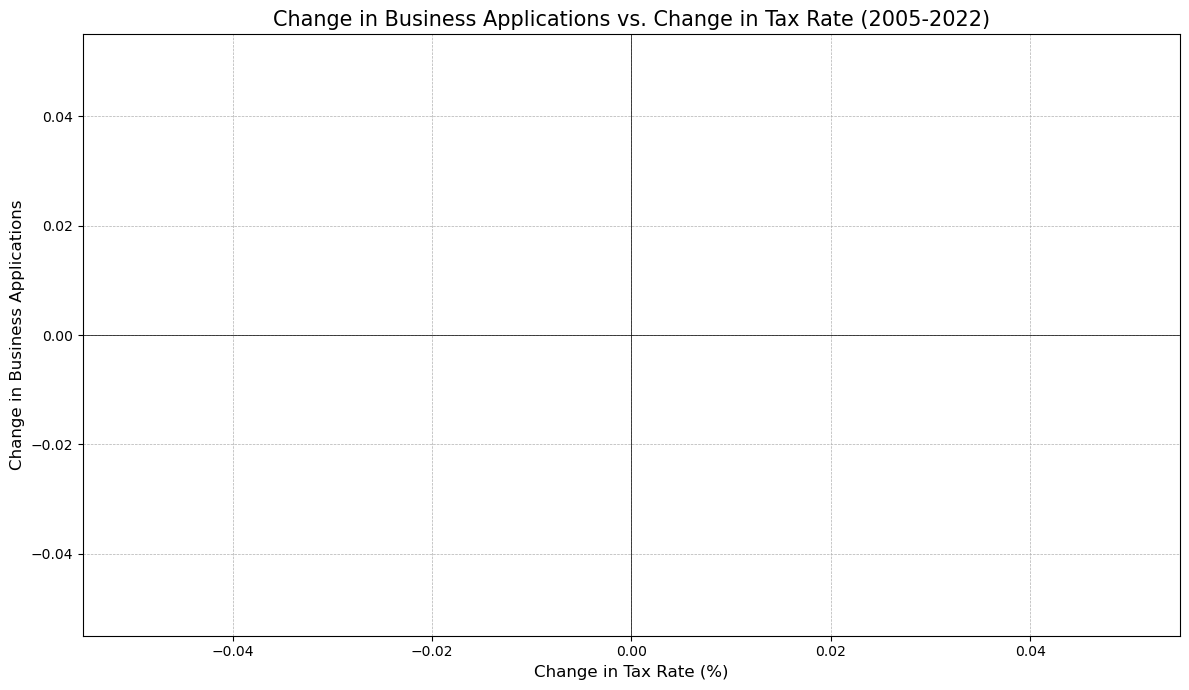

In [36]:
import matplotlib.pyplot as plt

# Merge the tax rates change and business applications change for the top states
merged_data = pd.merge(top_tax_change_states[['State', 'Change_2005_2022']], 
                       top_states_biz_apps[['State', 'Change_2005_2022']], 
                       on='State', 
                       suffixes=('_Tax_Rate', '_Biz_Apps'))

# Plotting
plt.figure(figsize=(12, 7))
plt.scatter(merged_data['Change_2005_2022_Tax_Rate'], 
            merged_data['Change_2005_2022_Biz_Apps'], 
            color='blue', 
            s=100)

# Annotate each point with state name
for i, state in enumerate(merged_data['State']):
    plt.annotate(state, 
                 (merged_data.iloc[i]['Change_2005_2022_Tax_Rate'], merged_data.iloc[i]['Change_2005_2022_Biz_Apps']),
                 fontsize=10,
                 ha='right')

plt.title('Change in Business Applications vs. Change in Tax Rate (2005-2022)', fontsize=15)
plt.xlabel('Change in Tax Rate (%)', fontsize=12)
plt.ylabel('Change in Business Applications', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.tight_layout()
plt.show()


## Number of Business Applications

In [42]:
# Loading data into Python with 'State' Columns as year column
biz_apps = pd.read_csv('data05-22/biz_apps_new.csv')
biz_apps = biz_apps.drop(columns = "State")
biz_apps.head()

,Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Alabama,31078,33918,33701,32222,29221,29916,28994,29694,29331,29574,31506,34286,36760,41948,41478,58557,75443,70750
1,Alaska,4730,5229,5138,4979,4396,4661,5083,5210,5383,5447,5901,6358,7263,9238,8118,8063,8063,8456
2,Arizona,56547,63067,64673,62972,58279,57926,57837,55305,55516,56401,57176,61448,67833,73424,76539,89957,113142,115080
3,Arkansas,19133,20400,19630,18707,17927,17843,17939,17812,17551,18445,19033,20445,23135,25678,25473,32314,41599,37562
4,California,271636,286652,286737,271606,249246,256436,270057,268103,278014,293443,303657,312636,326592,364807,364924,438554,519236,485954


In [43]:
# Create new dataframe with states with largest number of business applications
biz_apps_highest = biz_apps.nlargest(5,"2005")
biz_apps_highest

,Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,Florida,281702,290268,279459,258082,243920,252217,267246,269100,280413,299324,318823,339529,360105,393516,391658,497288,633654,607279
4,California,271636,286652,286737,271606,249246,256436,270057,268103,278014,293443,303657,312636,326592,364807,364924,438554,519236,485954
43,Texas,174117,186725,190621,191123,184426,196205,205197,207042,212102,224670,237389,258546,275271,298257,305036,386181,494210,464959
32,New York,173019,179132,182101,176082,169482,184317,189082,187118,193132,195021,199023,202399,214523,226804,229007,253660,309684,298059
10,Georgia,97214,109627,115128,112521,107275,108040,110542,110873,106961,115636,121120,132593,144553,160084,172020,269850,327144,272636


In [44]:
biz_apps_highest

,Name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
9,Florida,281702,290268,279459,258082,243920,252217,267246,269100,280413,299324,318823,339529,360105,393516,391658,497288,633654,607279
4,California,271636,286652,286737,271606,249246,256436,270057,268103,278014,293443,303657,312636,326592,364807,364924,438554,519236,485954
43,Texas,174117,186725,190621,191123,184426,196205,205197,207042,212102,224670,237389,258546,275271,298257,305036,386181,494210,464959
32,New York,173019,179132,182101,176082,169482,184317,189082,187118,193132,195021,199023,202399,214523,226804,229007,253660,309684,298059
10,Georgia,97214,109627,115128,112521,107275,108040,110542,110873,106961,115636,121120,132593,144553,160084,172020,269850,327144,272636


In [50]:
biz_apps_highest = biz_apps.set_index('Name')
biz_apps_highest

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Name,,,,,,,,,,,,,,,,,,
Alabama,31078,33918,33701,32222,29221,29916,28994,29694,29331,29574,31506,34286,36760,41948,41478,58557,75443,70750
Alaska,4730,5229,5138,4979,4396,4661,5083,5210,5383,5447,5901,6358,7263,9238,8118,8063,8063,8456
Arizona,56547,63067,64673,62972,58279,57926,57837,55305,55516,56401,57176,61448,67833,73424,76539,89957,113142,115080
Arkansas,19133,20400,19630,18707,17927,17843,17939,17812,17551,18445,19033,20445,23135,25678,25473,32314,41599,37562
California,271636,286652,286737,271606,249246,256436,270057,268103,278014,293443,303657,312636,326592,364807,364924,438554,519236,485954
Colorado,55916,59202,60869,60008,58510,61196,59275,60454,63559,69410,71605,74807,80174,87686,86401,93461,111028,115689
Connecticut,28378,30682,29812,28378,25851,26231,25979,26870,26117,26561,26196,27581,30105,33990,32869,37252,47244,44568
Delaware,11333,11698,13202,13468,12724,13029,14610,15436,15586,16829,16981,19468,23043,26295,25874,30994,44754,45471
District of Columbia,7293,7978,7840,8082,7659,7920,8472,8425,8514,9377,9976,9795,10667,11881,12244,14636,16806,14286


# Plots: Number of Business Applications over time for 5 states with change in tax rate

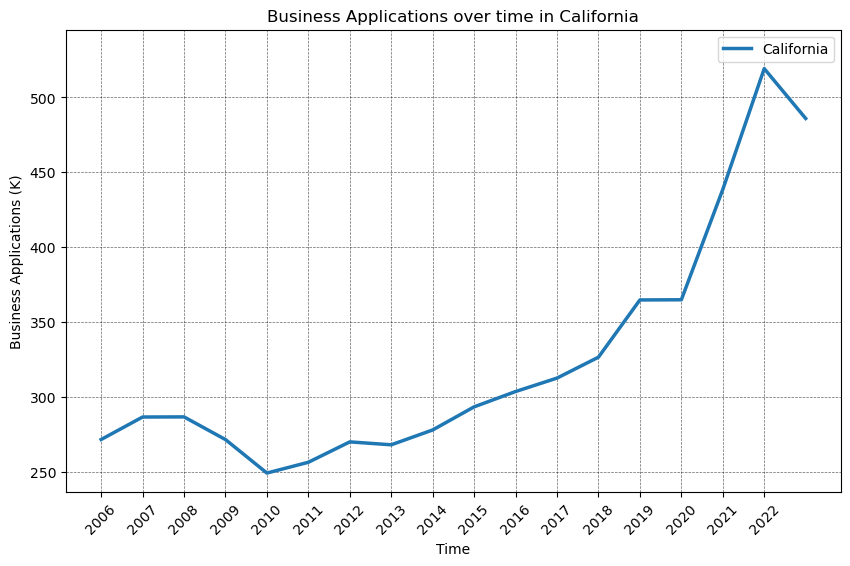

In [48]:
# Setting the 'State' column as the index for the biz_apps_highest dataframe
biz_apps_highest = biz_apps.set_index('Name')

# Excluding the non-numeric 'State.1' column and plotting the data for California
ca_plot = biz_apps_highest.loc['California', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)

# Setting labels and title
ca_plot.set_ylabel('Business Applications (K)')
ca_plot.set_xlabel('Time')
ca_plot.set_title('Business Applications over time in California')
plt.xticks(rotation=45) # Rotate years for better readability

# Set x-axis to include every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)


# Change absolute number of business applications by giving it in thousands
ca_plot.set_yticks(ca_plot.get_yticks())
ca_plot.set_yticklabels([int(y/1000) for y in ca_plot.get_yticks()])

# Change y-axis limit using buffer 
buffer = 0.05  # 5% buffer
ca_min = biz_apps_highest.loc['California', '2005':'2022'].min()
ca_max = biz_apps_highest.loc['California', '2005':'2022'].max()
ca_plot.set_ylim(ca_min - buffer * ca_min, ca_max + buffer * ca_max)

# Implement gridlines
ca_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and the plot
ca_plot.legend()
plt.show()


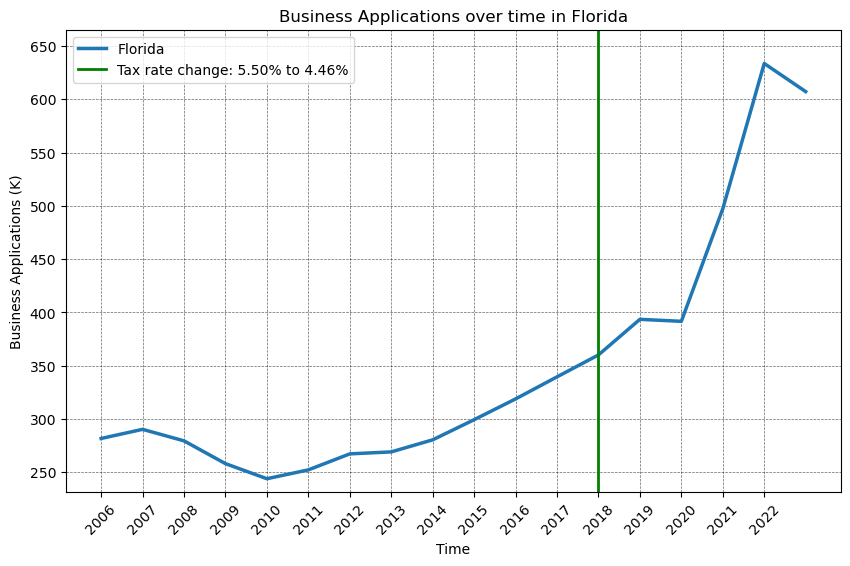

In [315]:
# Excluding the non-numeric 'State.1' column and plotting the data for Florida
fl_plot = biz_apps_highest.loc['Florida', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)

# Setting labels and title
fl_plot.set_ylabel('Business Applications (K)')
fl_plot.set_xlabel('Time')
fl_plot.set_title('Business Applications over time in Florida')
plt.xticks(rotation=45) # Rotate years for better readability

# Adding vertical lines for 2019 and 2020
fl_plot.axvline(x=biz_apps_highest.columns.get_loc('2019') - 2, color='green', linestyle='-', linewidth=2,
                label="Tax rate change: 5.50% to 4.46%")

#plt.xticks(ticks=range(len(fl_plot.index)), labels=fl_data.index, rotation=45)  # Display every year on x-axis
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)



# Change absolute number of business applications by giving it in thousands
fl_plot.set_yticks(fl_plot.get_yticks())
fl_plot.set_yticklabels([int(y/1000) for y in fl_plot.get_yticks()])

# Change y-axis limit using buffer 
buffer = 0.05  # 5% buffer
fl_min = biz_apps_highest.loc['Florida', '2005':'2022'].min()
fl_max = biz_apps_highest.loc['Florida', '2005':'2022'].max()
fl_plot.set_ylim(fl_min - buffer * fl_min, fl_max + buffer * fl_max)

# Implement gridlines
fl_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and the plot
fl_plot.legend()
plt.show()


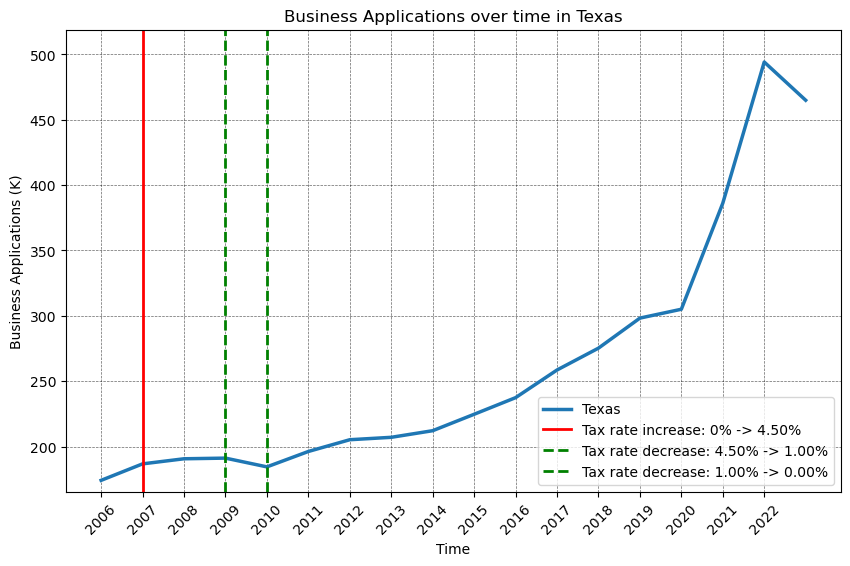

In [319]:
import matplotlib.pyplot as plt

# Plotting the data
#tx_plot = biz_apps_highest.loc['Texas'].plot(kind='line', figsize=(10, 6), lw = 2.5)

tx_plot = biz_apps_highest.loc['Texas', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)

# Setting labels and title
tx_plot.set_ylabel('Business Applications (K)')
tx_plot.set_xlabel('Time')
tx_plot.set_title('Business Applications over time in Texas')

# Set xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)

# Adding vertical lines for 2006, 2008, and 2009 indicating tax rate change
tx_plot.axvline(x = biz_apps_highest.columns.get_loc('2006'), color='red', linestyle='-', linewidth=2, label='Tax rate increase: 0% -> 4.50%')
tx_plot.axvline(x = biz_apps_highest.columns.get_loc('2008'), color='green', linestyle='--', linewidth=2, label='Tax rate decrease: 4.50% -> 1.00%')
tx_plot.axvline(x = biz_apps_highest.columns.get_loc('2009'), color='green', linestyle='--', linewidth=2, label='Tax rate decrease: 1.00% -> 0.00%')

# Change absolute number of business applications by giving it in thousands
tx_plot.set_yticks(tx_plot.get_yticks())
tx_plot.set_yticklabels([int(y/1000) for y in tx_plot.get_yticks()])


# Change y-axis limit using buffer 
buffer = 0.05  # 5% buffer
tx_min = biz_apps_highest.loc['Texas'].min()
tx_max = biz_apps_highest.loc['Texas'].max()
tx_plot.set_ylim(tx_min - buffer * tx_min, tx_max + buffer * tx_max)

# Implement gridlines
tx_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and the plot
tx_plot.legend()
plt.show()


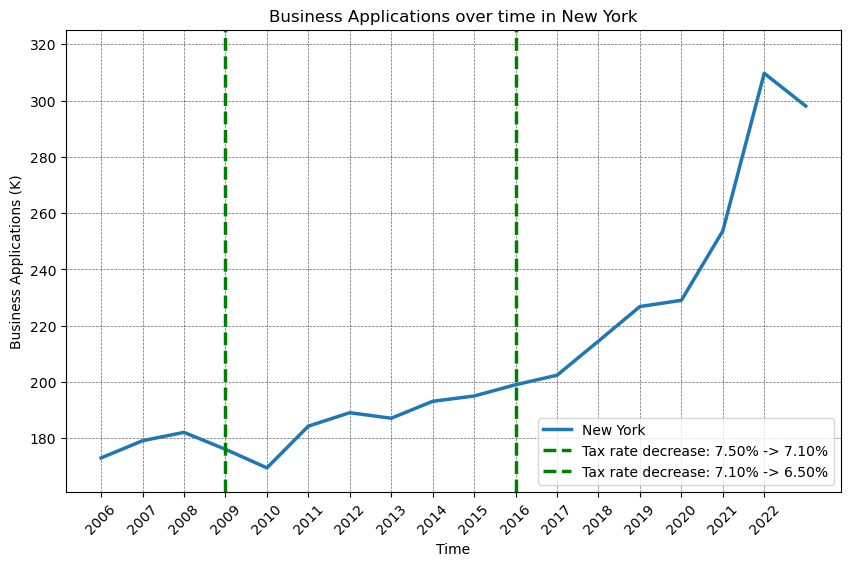

In [320]:
import matplotlib.pyplot as plt

# Plotting the data

ny_plot = biz_apps_highest.loc['New York', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)
#ny_plot = biz_apps_highest.loc['New York'].plot(kind='line', figsize=(10, 6), lw = 2.5)

# Setting labels and title
ny_plot.set_ylabel('Business Applications (K)')
ny_plot.set_xlabel('Time')
ny_plot.set_title('Business Applications over time in New York')

# Set xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)

# Adding vertical lines for 2019 and 2020
ny_plot.axvline(x = biz_apps_highest.columns.get_loc('2008'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 7.50% -> 7.10%')
ny_plot.axvline(x = biz_apps_highest.columns.get_loc('2015'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 7.10% -> 6.50%')


# Change absolute number of business applications by giving it in thousands
ny_plot.set_yticks(ny_plot.get_yticks())
ny_plot.set_yticklabels([int(y/1000) for y in ny_plot.get_yticks()])

# Change upper limit of 
#ny_plot.set_ylim(200 * 1000, 650 * 1000)
buffer = 0.05  # 5% buffer
ny_min = biz_apps_highest.loc['New York'].min()
ny_max = biz_apps_highest.loc['New York'].max()
ny_plot.set_ylim(ny_min - buffer * ny_min, ny_max + buffer * ny_max)


# Introudce gridlines
ny_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and the plot
ny_plot.legend()
plt.show()


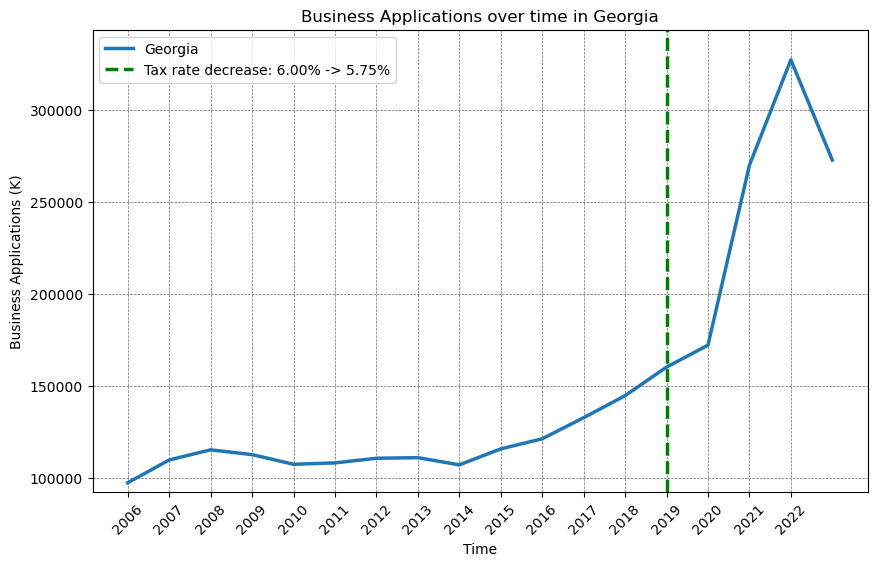

In [322]:
import matplotlib.pyplot as plt

# Plotting the data
ga_plot = biz_apps_highest.loc['Georgia', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)
#ga_plot = biz_apps_highest.loc['Georgia'].plot(kind='line', figsize=(10, 6), lw = 2.5, label = "Number of Business Applications in Georgia")

# Setting labels and title
ga_plot.set_ylabel('Business Applications (K)')
ga_plot.set_xlabel('Time')
ga_plot.set_title('Business Applications over time in Georgia')

# Set xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)

# Adding vertical lines for 2018 indicating decrease in tax rate
ga_plot.axvline(x = biz_apps_highest.columns.get_loc('2018'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 6.00% -> 5.75%')

# Change absolute number of business applications by giving it in thousands
#ga_plot.set_yticks(ax.get_yticks())
#ga_plot.set_yticklabels([int(y/1000) for y in fl_plot.get_yticks()])


# Change upper limit of 
#ny_plot.set_ylim(200 * 1000, 650 * 1000)
buffer = 0.05  # 5% buffer
ga_min = biz_apps_highest.loc['Georgia'].min()
ga_max = biz_apps_highest.loc['Georgia'].max()
ga_plot.set_ylim(ga_min - buffer * ga_min, ga_max + buffer * ga_max)

# Introudce gridlines
ga_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and the plot
ga_plot.legend()
plt.show()

## Plots of states with largest change in tax rate

In [237]:
tr_change_largest

,State,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,State
35,Ohio,0.0,0.0,0.00,-6.54,0.0,-0.26,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,Ohio
22,Michigan,0.0,0.0,3.05,0.00,0.0,-4.95,6.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,Michigan
43,Texas,4.5,0.0,-3.50,-1.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,Texas
25,Missouri,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,-2.25,0.0,0.0,Missouri
13,Illinois,0.0,0.0,0.00,0.00,0.0,2.20,0.0,0.0,0.0,-1.75,0.0,0.0,1.75,0.0,0.00,0.0,0.0,Illinois


In [274]:
# Subset the biz_apps data for the specified states
selected_states = ['Ohio', 'Michigan', 'Texas', 'Missouri', 'Illinois']
subset_biz_apps = biz_apps_highest.loc[selected_states]

In [273]:
subset_biz_apps

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,
Ohio,66112,66932,67894,68287,67582,69578,72454,71971,70503,71121,73257,76671,85135,90856,94932,127113,155255,139706
Michigan,76018,78336,79253,77894,73228,75717,75329,74134,72498,73849,74641,79164,84081,94121,94441,130253,150826,136794
Texas,174117,186725,190621,191123,184426,196205,205197,207042,212102,224670,237389,258546,275271,298257,305036,386181,494210,464959
Missouri,44731,47386,45547,43895,41192,43043,43616,44508,43847,44159,47213,51503,54950,58690,58803,69989,84377,80770
Illinois,95482,98379,99688,106666,95952,98430,99249,95604,95308,98226,98701,100022,104197,116355,117402,170502,199344,169449


In [296]:
tax_rates.iloc[35]

State               Ohio 
2005                  6.8
2006                  6.8
2007                  6.8
2008                  6.8
2009                 0.26
2010                 0.26
2011                  0.0
2012                  0.0
2013                  0.0
2014                  0.0
2015                  0.0
2016                  0.0
2017                  0.0
2018                  0.0
2019                  0.0
2020                  0.0
2021                  0.0
2022                  0.0
Change_2005_2022     -6.8
Name: 35, dtype: object

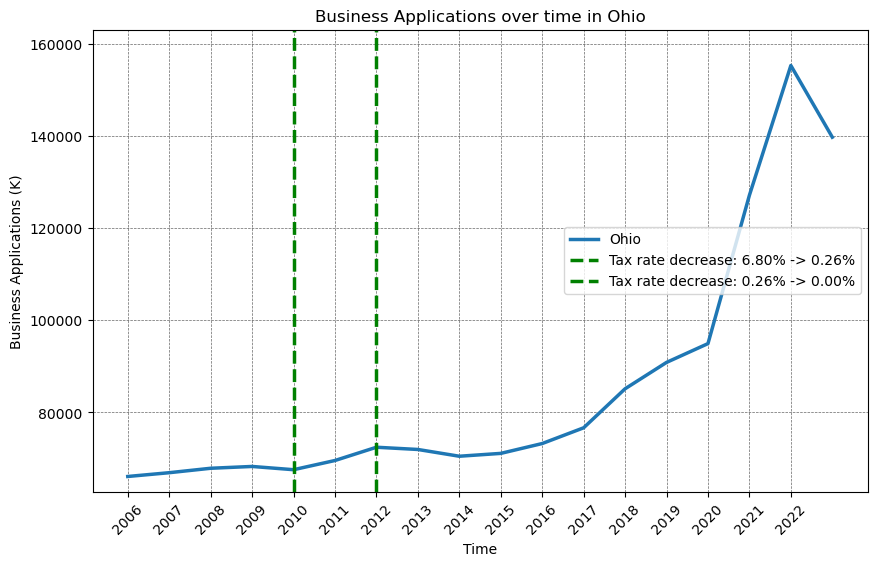

In [323]:
# Plotting the data
oh_plot = subset_biz_apps.loc['Ohio', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)
#ga_plot = biz_apps_highest.loc['Georgia'].plot(kind='line', figsize=(10, 6), lw = 2.5, label = "Number of Business Applications in Georgia")

# Setting labels and title
oh_plot.set_ylabel('Business Applications (K)')
oh_plot.set_xlabel('Time')
oh_plot.set_title('Business Applications over time in Ohio')

# et xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)


# Adding vertical lines for 2018 indicating decrease in tax rate
oh_plot.axvline(x = subset_biz_apps.columns.get_loc('2009'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 6.80% -> 0.26%')
oh_plot.axvline(x = subset_biz_apps.columns.get_loc('2011'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 0.26% -> 0.00%')

# Change absolute number of business applications by giving it in thousands
#ga_plot.set_yticks(ax.get_yticks())
#ga_plot.set_yticklabels([int(y/1000) for y in fl_plot.get_yticks()])


# Change upper limit of 
#ny_plot.set_ylim(200 * 1000, 650 * 1000)
buffer = 0.05  # 5% buffer
oh_min = biz_apps_highest.loc['Ohio'].min()
oh_max = biz_apps_highest.loc['Ohio'].max()
oh_plot.set_ylim(oh_min - buffer * oh_min, oh_max + buffer * oh_max)

# Introudce gridlines
oh_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and the plot
oh_plot.legend()
plt.show()

In [299]:
tax_rates.iloc[22]

State               Michigan
2005                     1.9
2006                     1.9
2007                     1.9
2008                    4.95
2009                    4.95
2010                    4.95
2011                     0.0
2012                     6.0
2013                     6.0
2014                     6.0
2015                     6.0
2016                     6.0
2017                     6.0
2018                     6.0
2019                     6.0
2020                     6.0
2021                     6.0
2022                     6.0
Change_2005_2022         4.1
Name: 22, dtype: object

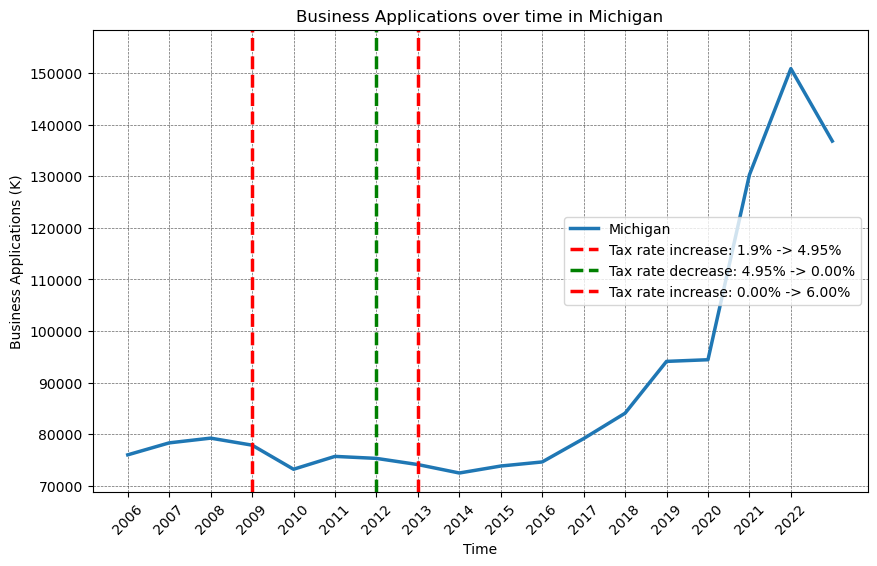

In [324]:
# Plotting the data
mi_plot = subset_biz_apps.loc['Michigan', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)
#ga_plot = biz_apps_highest.loc['Georgia'].plot(kind='line', figsize=(10, 6), lw = 2.5, label = "Number of Business Applications in Georgia")

# Setting labels and title
mi_plot.set_ylabel('Business Applications (K)')
mi_plot.set_xlabel('Time')
mi_plot.set_title('Business Applications over time in Michigan')

# Set xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)


# Adding vertical lines for 2018 indicating decrease in tax rate
mi_plot.axvline(x = subset_biz_apps.columns.get_loc('2008'), color='red', linestyle='--', linewidth=2.5, label='Tax rate increase: 1.9% -> 4.95%')
mi_plot.axvline(x = subset_biz_apps.columns.get_loc('2011'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 4.95% -> 0.00%')
mi_plot.axvline(x = subset_biz_apps.columns.get_loc('2012'), color='red', linestyle='--', linewidth=2.5, label='Tax rate increase: 0.00% -> 6.00%')


# Change absolute number of business applications by giving it in thousands
#ga_plot.set_yticks(ax.get_yticks())
#ga_plot.set_yticklabels([int(y/1000) for y in fl_plot.get_yticks()])


# Change upper limit of 
#ny_plot.set_ylim(200 * 1000, 650 * 1000)
buffer = 0.05  # 5% buffer
mi_min = subset_biz_apps.loc['Michigan'].min()
mi_max = subset_biz_apps.loc['Michigan'].max()
mi_plot.set_ylim(mi_min - buffer * mi_min, mi_max + buffer * mi_max)

# Introudce gridlines
mi_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and bthe plot
mi_plot.legend()
plt.show()

In [303]:
tax_rates.iloc[25]

State               Missouri
2005                    6.25
2006                    6.25
2007                    6.25
2008                    6.25
2009                    6.25
2010                    6.25
2011                    6.25
2012                    6.25
2013                    6.25
2014                    6.25
2015                    6.25
2016                    6.25
2017                    6.25
2018                    6.25
2019                    6.25
2020                     4.0
2021                     4.0
2022                     4.0
Change_2005_2022       -2.25
Name: 25, dtype: object

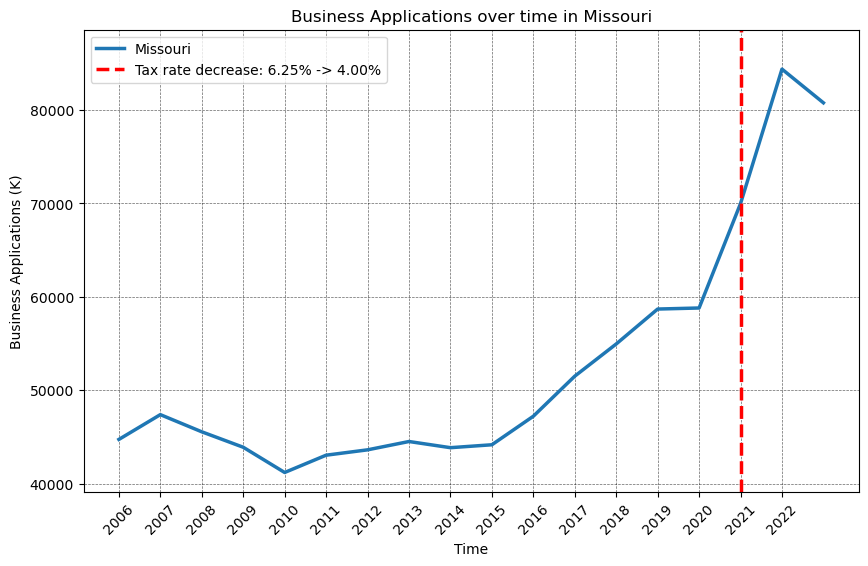

In [325]:
# Plotting the data
mo_plot = subset_biz_apps.loc['Missouri', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)
#ga_plot = biz_apps_highest.loc['Georgia'].plot(kind='line', figsize=(10, 6), lw = 2.5, label = "Number of Business Applications in Georgia")

# Setting labels and title
mo_plot.set_ylabel('Business Applications (K)')
mo_plot.set_xlabel('Time')
mo_plot.set_title('Business Applications over time in Missouri')

# Set xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)


# Adding vertical lines for 2018 indicating decrease in tax rate
mo_plot.axvline(x = subset_biz_apps.columns.get_loc('2020'), color='red', linestyle='--', linewidth=2.5, label='Tax rate decrease: 6.25% -> 4.00%')


# Change absolute number of business applications by giving it in thousands
#ga_plot.set_yticks(ax.get_yticks())
#ga_plot.set_yticklabels([int(y/1000) for y in fl_plot.get_yticks()])


# Change upper limit of 
#ny_plot.set_ylim(200 * 1000, 650 * 1000)
buffer = 0.05  # 5% buffer
mo_min = subset_biz_apps.loc['Missouri'].min()
mo_max = subset_biz_apps.loc['Missouri'].max()
mo_plot.set_ylim(mo_min - buffer * mo_min, mo_max + buffer * mo_max)

# Introudce gridlines
mo_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and bthe plot
mo_plot.legend()
plt.show()

In [308]:
tax_rates.iloc[13]

State               Illinois
2005                     7.3
2006                     7.3
2007                     7.3
2008                     7.3
2009                     7.3
2010                     7.3
2011                     9.5
2012                     9.5
2013                     9.5
2014                     9.5
2015                    7.75
2016                    7.75
2017                    7.75
2018                     9.5
2019                     9.5
2020                     9.5
2021                     9.5
2022                     9.5
Change_2005_2022         2.2
Name: 13, dtype: object

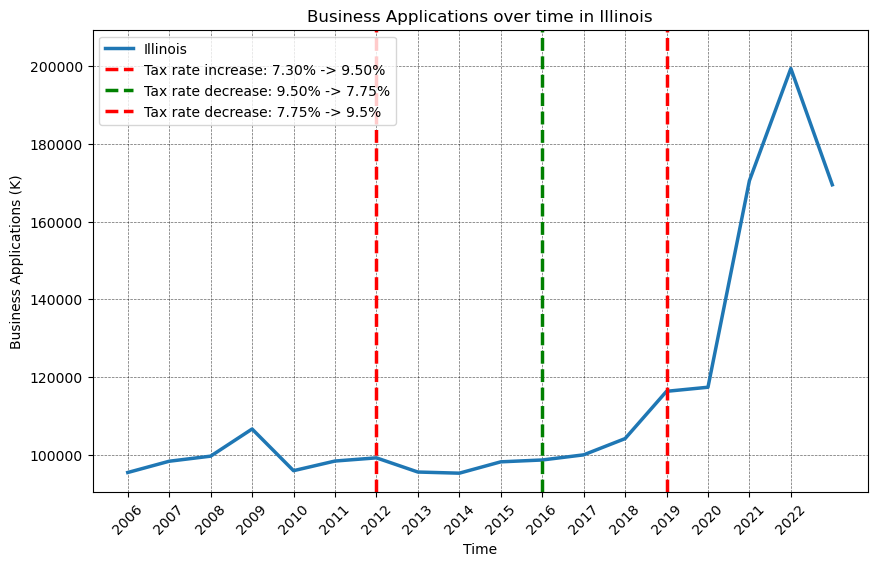

In [326]:
# Plotting the data
il_plot = subset_biz_apps.loc['Illinois', '2005':'2022'].plot(kind='line', figsize=(10, 6), lw=2.5)
#ga_plot = biz_apps_highest.loc['Georgia'].plot(kind='line', figsize=(10, 6), lw = 2.5, label = "Number of Business Applications in Georgia")

# Setting labels and title
il_plot.set_ylabel('Business Applications (K)')
il_plot.set_xlabel('Time')
il_plot.set_title('Business Applications over time in Illinois')

# Set xticks to every year in the data
plt.xticks(ticks=range(len(biz_apps_highest.columns[1:])), labels=biz_apps_highest.columns[1:], rotation=45)


# Adding vertical lines for 2018 indicating decrease in tax rate
il_plot.axvline(x = subset_biz_apps.columns.get_loc('2011'), color='red', linestyle='--', linewidth=2.5, label='Tax rate increase: 7.30% -> 9.50%')
il_plot.axvline(x = subset_biz_apps.columns.get_loc('2015'), color='green', linestyle='--', linewidth=2.5, label='Tax rate decrease: 9.50% -> 7.75%')
il_plot.axvline(x = subset_biz_apps.columns.get_loc('2018'), color='red', linestyle='--', linewidth=2.5, label='Tax rate decrease: 7.75% -> 9.5%')


# Change absolute number of business applications by giving it in thousands
#ga_plot.set_yticks(ax.get_yticks())
#ga_plot.set_yticklabels([int(y/1000) for y in fl_plot.get_yticks()])


# Change upper limit of 
#ny_plot.set_ylim(200 * 1000, 650 * 1000)
buffer = 0.05  # 5% buffer
il_min = subset_biz_apps.loc['Illinois'].min()
il_max = subset_biz_apps.loc['Illinois'].max()
il_plot.set_ylim(il_min - buffer * il_min, il_max + buffer * il_max)

# Introudce gridlines
il_plot.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)

# Showing the legend and bthe plot
il_plot.legend()
plt.show()

In [1]:
# Adjusted code

# 1. Load and Explore the Data
# Note: Replace the path with the actual path to your data file
data = biz_apps

#pd.read_csv("/path/to/your/datafile.csv")
# print(data.head())
# print(data.describe())

# 2. Graphical EDA

# Trends Over Time
states_to_plot = ['California', 'Texas', 'Florida', 'New York', 'Pennsilvania']  # Select any states you're interested in
for state in states_to_plot:
    state_data = data[data['State'] == state].iloc[:, 1:].T
    state_data.columns = ['Business Applications']
    state_data.plot(title=f"Business Applications over time in {state}")
    plt.ylabel = ('Business Applications')
    plt.xlabel = ('Year')
    plt.show()

# Adjusting the data for heatmap and re-generating it

# Create a heatmap-ready dataset (excluding non-numeric columns)
heatmap_data = biz_apps.drop(columns=['Name', 'State']).set_index(biz_apps['State'])

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Business Applications Heatmap by State")
plt.show()

# Yearly Growth (using a sample state for demonstration)
state = 'California'
state_data = data[data['State'] == state].iloc[:, 1:].T
state_data.columns = ['Business Applications']
state_data['Growth Rate'] = state_data.pct_change() * 100
state_data['Growth Rate'].plot(kind='bar', title=f"Yearly Growth Rate for {state}")
plt.ylabel = ('Growth Rate (%)')
plt.show()

# 3. Non-Graphical EDA

# Descriptive Statistics
print(data.describe())

# Yearly Growth Analysis
growth_data = data.iloc[:, 1:].pct_change(axis=1) * 100
highest_growth_states = growth_data.idxmax()
lowest_growth_states = growth_data.idxmin()
print("States with Highest Growth:", highest_growth_states)
print("States with Lowest Growth:", lowest_growth_states)


NameError: name 'biz_apps' is not defined

In [ ]:
import seaborn as sns

# Adjusted code segment execution

# 1. Load and Explore the Data (already done)

# 2. Graphical EDA

# Trends Over Time for selected states
states_to_plot = ['CA', 'TX', 'FL', 'NY', 'PA']  # Selected states
for state in states_to_plot:
    state_data = biz_apps[biz_apps['State'] == state].iloc[:, 2:].T
    state_data.columns = ['Business Applications']
    plt.figure(figsize=(10, 6))
    state_data.plot(title=f"Business Applications over time in {state}", ax=plt.gca())
    plt.ylabel('Business Applications')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)
    plt.show()

# Adjusting the data for heatmap and re-generating it

# Create a heatmap-ready dataset (excluding non-numeric columns)
heatmap_data = biz_apps.drop(columns=['Name', 'State']).set_index(biz_apps['State'])

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title("Business Applications Heatmap by State")
plt.show()


# Yearly Growth (using a sample state for demonstration)
state = 'CA'
state_data = biz_apps[biz_apps['State'] == state].iloc[:, 2:].T
state_data.columns = ['Business Applications']
state_data['Growth Rate'] = state_data.pct_change() * 100
plt.figure(figsize=(10, 6))
state_data['Growth Rate'].plot(kind='bar', title=f"Yearly Growth Rate for {state}")
plt.ylabel('Growth Rate (%)')
plt.xlabel('Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='black', alpha=0.6)
plt.show()

# 3. Non-Graphical EDA

# Descriptive Statistics
desc_stats = biz_apps.describe()

# Yearly Growth Analysis
growth_data = biz_apps.iloc[:, 2:].pct_change(axis=1) * 100
highest_growth_states = growth_data.idxmax()
lowest_growth_states = growth_data.idxmin()

desc_stats, highest_growth_states, lowest_growth_states


Next steps: Create correlation graph between number of businesses and tax rates

E

In [188]:
import pandas as pd

# Load the data (assuming the data is loaded into respective DataFrames)
# tax_rates = pd.read_csv("Tax rates by state 2000-2023.csv")
# biz_apps = pd.read_csv("biz_apps.csv")

# Calculate the yearly average tax rate for each state
yearly_avg_tax = tax_rates.groupby('State').mean()

# Calculate the yearly sum of business applications for each state
yearly_sum_apps = biz_apps.set_index(biz_apps.iloc[:, 0], inplace=True).drop(columns='Name').sum(axis=1)

# Map for state abbreviations to full state names
state_mapping = {
    # ... (as above)
}

# Map state abbreviations to full state names
yearly_sum_apps = yearly_sum_apps.rename(index=state_mapping)

# Compute the correlation
correlation_values = yearly_avg_tax.corrwith(yearly_sum_apps)
correlation_values_sorted = correlation_values.sort_values(ascending=False)
print(correlation_values_sorted)


AttributeError: 'NoneType' object has no attribute 'drop'